#**Grupo 7**

##- Miguel Angel Gómez Pineda
##**Compañero de trabajo:**
##- Camilo Londoño Vera

## Campo eléctrico 
1. Elaborar un programa para calcular el campo eléctrico producido por un dipolo eléctrico, realizar una representación del campo para todo el dominio 
elegido para calcular el campo. Para encontrar el campo, se sugiere hacer lo siguiente:

- a. Encontrar el campo en un punto producido por dos cargas q1 y q2
- b. Emplee el comando  plt.quiver(x, y, Ex, Ey) para mostrar el campo producido por q1 y q2. Puedes intentarlo con el comando, plt.stremplot.
- c. Generalice el problema para varios puntos en el espacio.

Se recomienda emplear numpy array.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = 1

def E_campo(q, r ):
  """
  Magnitud del campo electrico
  """
  global k
  return k*q/r**2

In [ ]:
def Campo_fuente(r_source, rp) : 
  """
  Parameter
  ---------
  rsource: numpy array de 2D, con la posicion de la fuente
  rp     : numpy array de 2D, El punto donde se encontrará el campo

  Return
  ----------
  Ex: Componente x del campo electrico
  Ey: Componente y del campo electrico 
  """
  Delta_R =  rp - r_source
  MagDelta_R = np.sqrt(Delta_R[0]**2 + Delta_R[1]**2)
  
  if MagDelta_R != 0:
    u_R = Delta_R/MagDelta_R
 
    E = E_campo(1,MagDelta_R ) * u_R
    Ex = E[0]
    Ey = E[1]
    return Ex, Ey
  else:
    pass  

In [ ]:
r_source={"q1": np.array([-2, 0]),"q2": np.array([2, 0])}  #Posición de la fuente
rp1=0
rp2=0 

In [ ]:
x  = np.arange(-5, 6, 1)
n1 = len(x)
y  = np.arange(-5, 6, 1)
n2 = len(y)


In [ ]:
rp1 = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp1[k] = np.array([x_, y_])
    k=k+1  

rp2 = np.zeros((n1*n2 , 2))
k = 0
for x_ in (x):
  for y_ in (y):
    rp2[k] = np.array([x_, y_])
    k=k+1        

In [ ]:
E1 = np.zeros((n1*n2, 2))

for i in range(0, len(rp1)):
  E1[i] = Campo_fuente(r_source["q1"], rp1[i] )

E2 = np.zeros((n1*n2, 2))

for i in range(0, len(rp2)):
  E2[i] = Campo_fuente(r_source["q2"], rp2[i] )

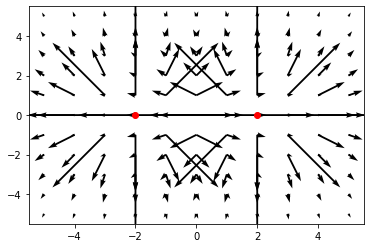

In [ ]:
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro" ) 
plt.quiver(rp1[:,0], rp1[:,1], E1[:,0], E1[:,1])
plt.plot(r_source["q2"][0], r_source["q2"][1], "ro" ) 
plt.quiver(rp2[:,0], rp2[:,1], E2[:,0], E2[:,1])

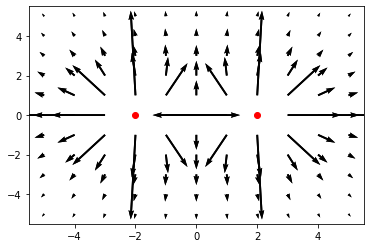

In [ ]:

Ex=E1[:,0]+E2[:,0]
Ey=E1[:,1]+E2[:,1]
plt.plot(r_source["q1"][0], r_source["q1"][1], "ro" )
plt.quiver(rp1[:,0], rp1[:,1], Ex, Ey)
plt.plot(r_source["q2"][0], r_source["q2"][1], "ro" ) 
plt.quiver(rp2[:,0], rp2[:,1], Ex, Ey)

## Movimiento parabólico.
2. Un jugador de baloncesto desea saber si encestará su tiro dependiendo de la velocidad inicial, ángulo de lanzamiento y posición respecto a la canasta. 

Elabore un programa en el que dada una distancia, velocidad inicial y  ángulo, determine si hay cesta. El modelo será bajo partícula, sin la rotación del balón. 

Se recomienda emplear numpy array. 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def tiro_parabolico(x, Vo, theta, g):
  """
  Parameter
  ---------
  x    :  Distancia horizontal a la que se encuentra la canasta
  Vo   :  Valocidad inicial a la que se lanza la pelota
  theta:  Ángulo al que se lanza la pelota
  g    :  Valor de la gravedad

  Return
  ----------
  y    :  Altura a la cual pasara la pelota
  """

  Vox = Vo*np.cos(theta*(np.pi/180))
  Voy = Vo*np.sin(theta*(np.pi/180))

  y = Voy*(x/Vox)-((1/2)*(g)*((x/Vox)**2))

  return (y)  

Ingrese la distancia horizaontal en Metros de la cesta:
20
Ingrese velocidad incial en Metros por segundos:
25
Ingrese la altura del aro en metros:
15
Ingrese el ángulo de lanzamiento en grados:
80
No Encesta


<function matplotlib.pyplot.show>

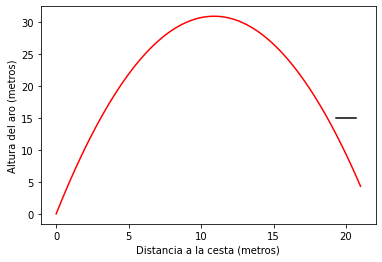

In [ ]:
x = float(input("Ingrese la distancia horizaontal en Metros de la cesta:\n"))
Vo = float(input("Ingrese velocidad incial en Metros por segundos:\n"))
h = float(input("Ingrese la altura del aro en metros:\n"))
theta = float(input("Ingrese el ángulo de lanzamiento en grados:\n"))
g = 9.81 # Valor de la gravedad de la tierra en m/s^2

H1 = tiro_parabolico(x-0.7, Vo, theta, g)

H2 = tiro_parabolico(x+0.7,Vo, theta, g)

if H1 > h > H2:
  print ("Encesta")
elif H1 < h < H2:
  print("La pelota pasó por debajo del aro")
else:
  print("No Encesta")    
  
eje_x=np.linspace(0, x+1, 100)
H3=tiro_parabolico(eje_x, Vo, theta, g)
cesta_x = np.linspace (x-0.7,x+0.7,100)
cesta_y = np.full(len(cesta_x),h)
plt.plot(eje_x, H3, color='red')
plt.plot(cesta_x, cesta_y, color='black')
plt.xlabel('Distancia a la cesta (metros)')
plt.ylabel('Altura del aro (metros)')
plt.show